In [1260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster

In [1261]:
#Dataset: https://www.kaggle.com/datasets/ivanchvez/ny-rental-properties-pricing

In [1262]:
df = pd.read_csv('nyrental/NY Realstate Pricing.csv')
df = df.drop(columns=['F1', 'id'])

df

,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242
...,...,...,...,...,...,...,...,...,...,...
17609,Brooklyn,40.69312,-73.94073,Shared room,32,9,31,5,0.26,1
17610,Brooklyn,40.65446,-73.92613,Shared room,99,7,100,1,0.03,0
17611,Lower East Side,40.71172,-73.98864,Shared room,41,14,180,2,0.12,365
17612,Manhattan,40.71113,-73.98840,Shared room,38,0,180,1,0.27,365


array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'days_occupied_in_2019'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'availability_2020'}>,
        <AxesSubplot:>]], dtype=object)

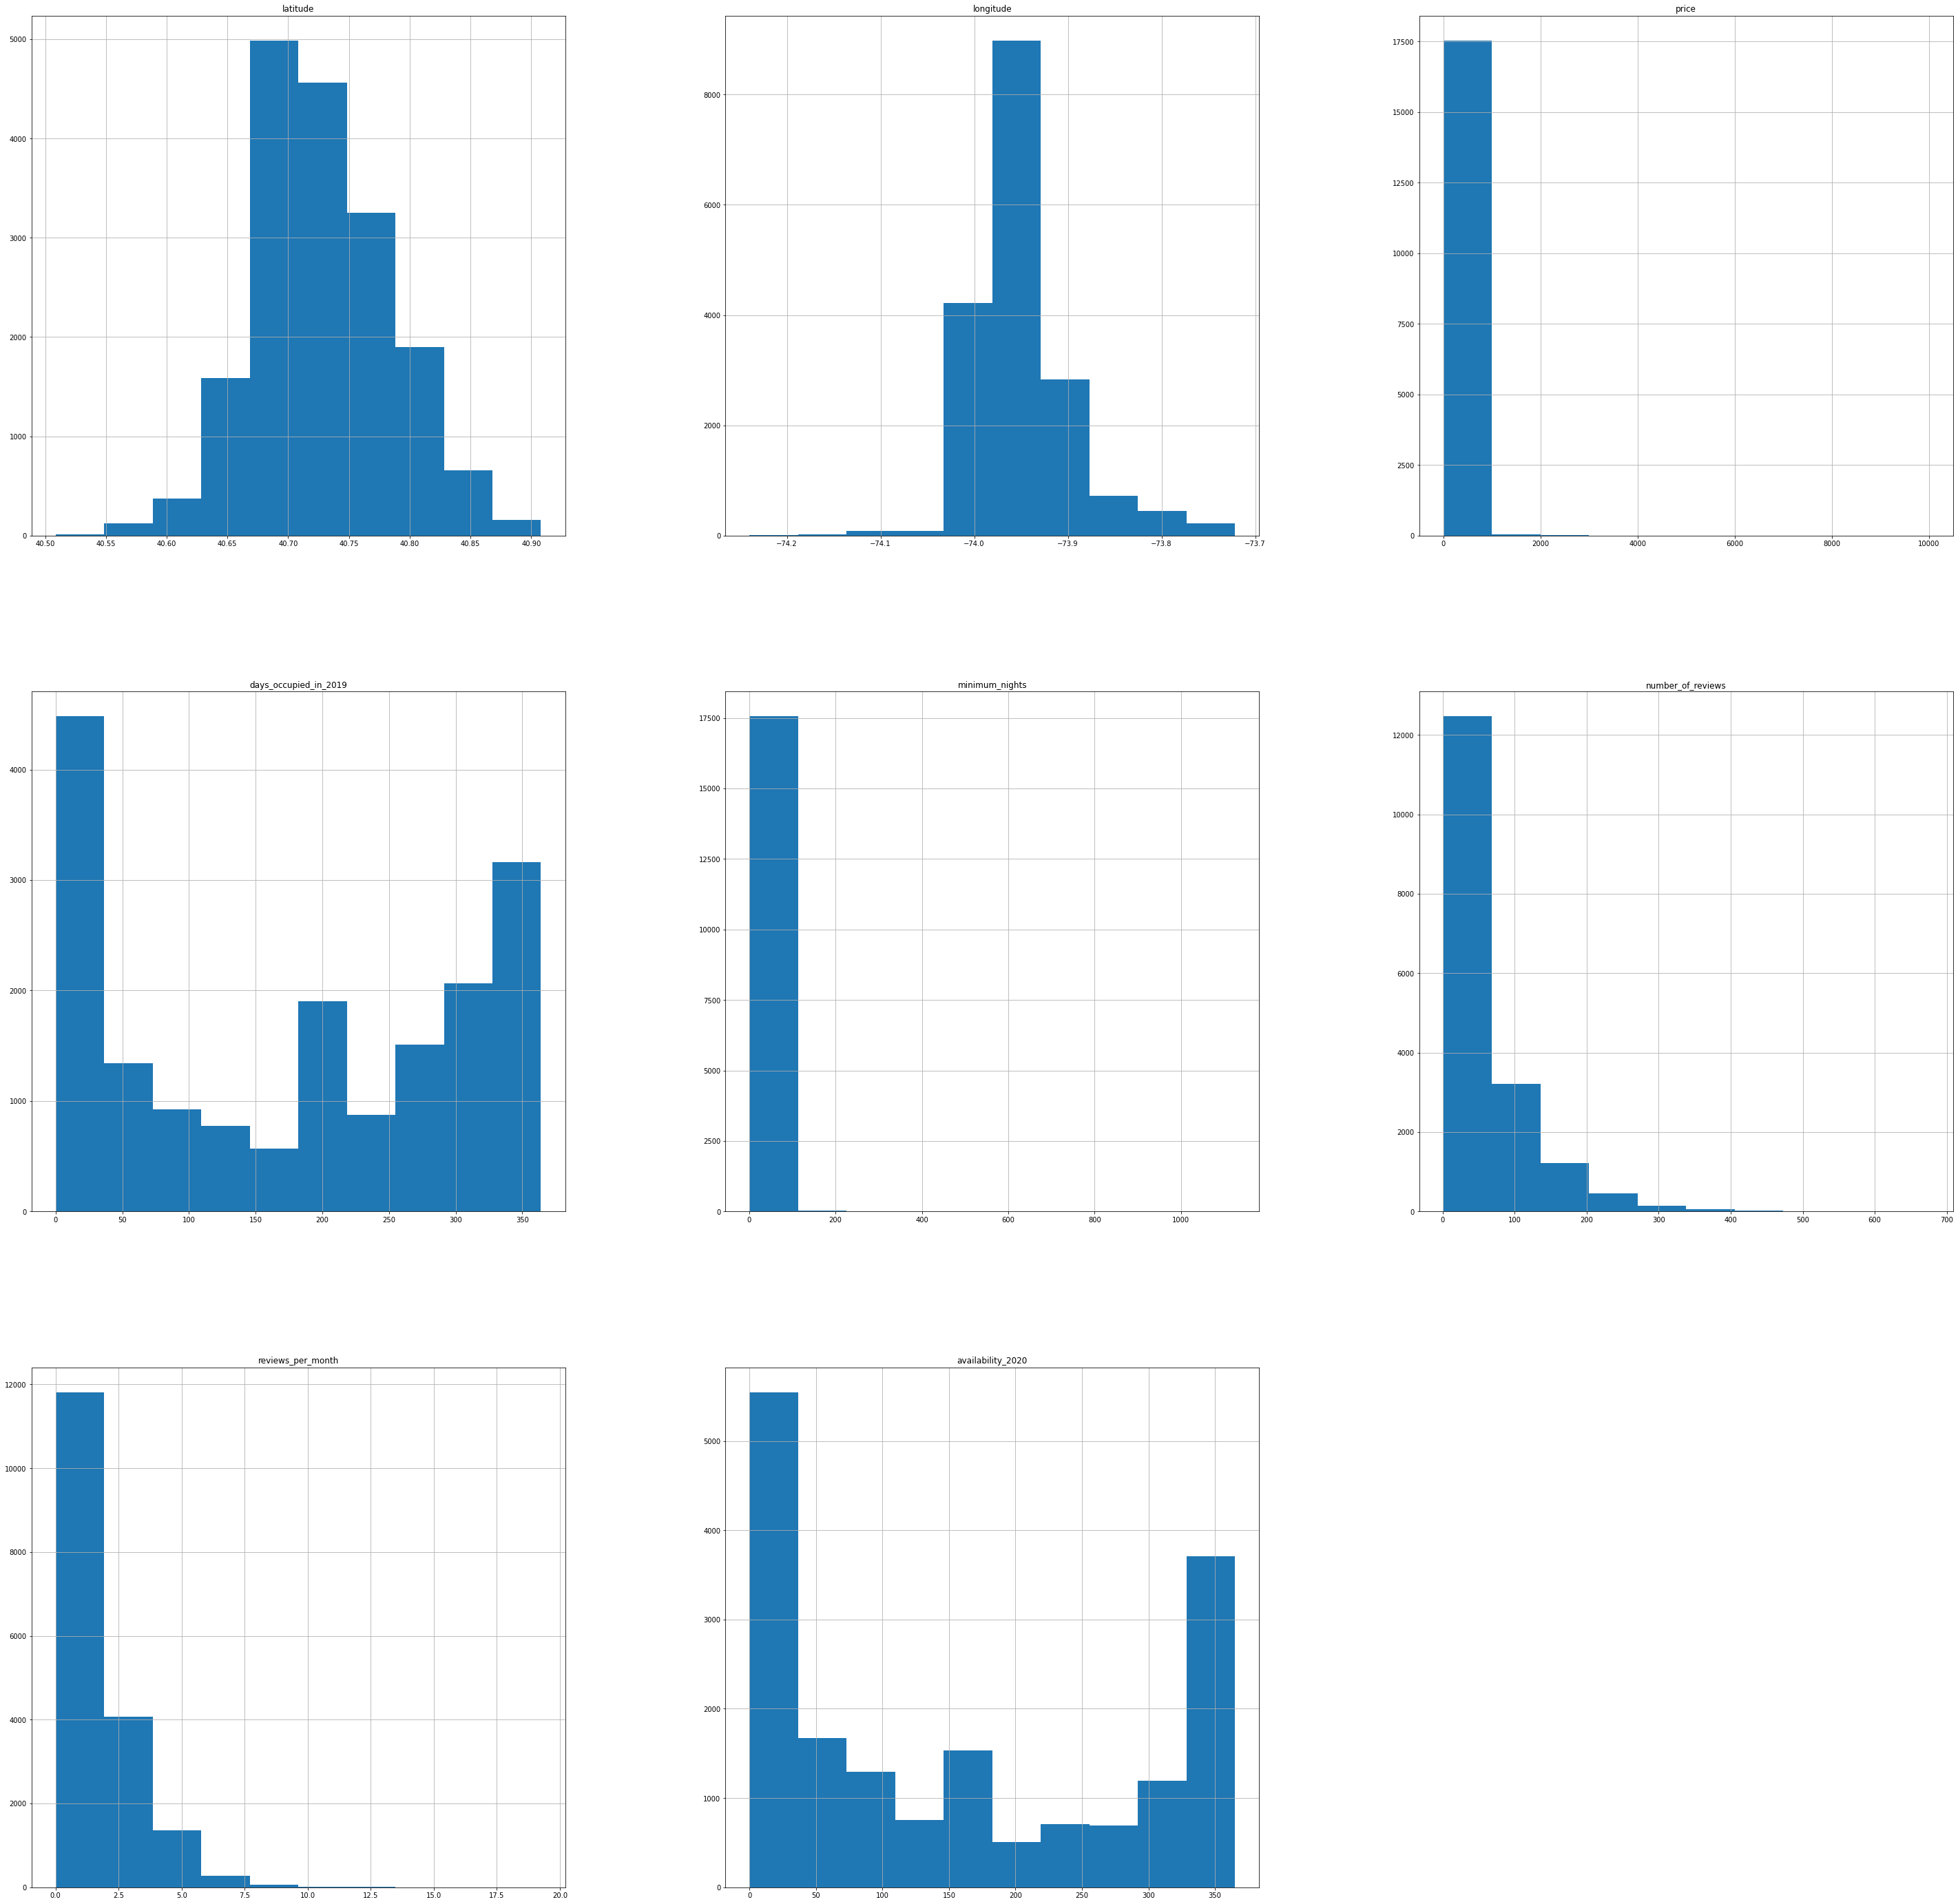

In [1263]:
df.hist(figsize=(50, 50))

/tmp/ipykernel_141543/2560365695.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


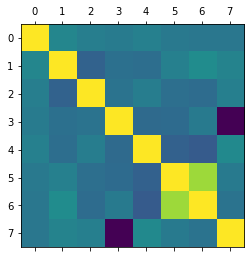

In [1264]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())

In [1265]:
z = set(df['neighbourhood'].unique())
neighbourhoods = dict([(y, x) for (x, y) in list(enumerate(z))])

neighbourhoods

{'Inwood': 0,
 'Williamsburg': 1,
 'Alphabet City': 2,
 'South Street Seaport': 3,
 'Civic Center': 4,
 'Claremont': 5,
 'South Ozone Park': 6,
 'Gowanus': 7,
 'Brownsville': 8,
 'Brighton Beach': 9,
 'Jackson Heights': 10,
 'Union Square': 11,
 'Wakefield': 12,
 'Red Hook': 13,
 'Longwood': 14,
 'Bedford Park': 15,
 'Flatiron District': 16,
 'East Harlem': 17,
 'Lower East Side': 18,
 'Concord': 19,
 'Stapleton': 20,
 'Harlem': 21,
 'Midwood': 22,
 'Lefferts Garden': 23,
 'Castle Hill': 24,
 'Astoria': 25,
 'Ozone Park': 26,
 'Eastchester': 27,
 'Kensington': 28,
 'Highbridge': 29,
 'Boerum Hill': 30,
 'Long Island City': 31,
 'Randall Manor': 32,
 'Annadale': 33,
 'Manhattan Beach': 34,
 'Park Slope': 35,
 'Kew Garden Hills': 36,
 'Westerleigh': 37,
 'Bensonhurst': 38,
 'Tremont': 39,
 'University Heights': 40,
 'Sea Gate': 41,
 'Bayside': 42,
 'Soundview': 43,
 'Rosebank': 44,
 'Woodlawn': 45,
 'Elmhurst': 46,
 'Port Richmond': 47,
 'Utopia': 48,
 'Soho': 49,
 'Borough Park': 50,
 '

In [1266]:
z = set(df['room_type'].unique())
room_types = dict([(y, x) for (x, y) in list(enumerate(z))])

room_types

{'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2, 'Hotel room': 3}

In [1267]:
df.describe()

,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
count,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,40.726755,-73.947732,145.455490,179.517656,7.392926,56.128988,1.607060,154.154763
std,0.056981,0.050213,194.990677,130.202015,19.233869,65.972370,1.635528,138.079651
min,40.508680,-74.239860,0.000000,0.000000,1.000000,1.000000,0.010000,0.000000
25%,40.686042,-73.980938,70.000000,35.000000,2.000000,9.000000,0.340000,8.000000
50%,40.720540,-73.953050,109.000000,198.000000,3.000000,33.000000,1.060000,125.000000
75%,40.763127,-73.930682,170.000000,301.000000,5.000000,79.000000,2.460000,309.000000
max,40.908040,-73.721790,9999.000000,364.000000,1125.000000,675.000000,19.250000,365.000000


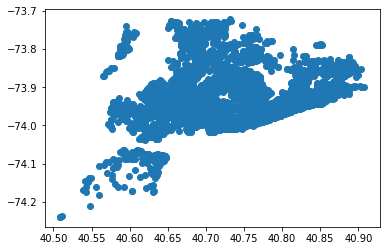

In [1268]:
plt.scatter(df['latitude'], df['longitude'])

In [1269]:
locations = np.array(df[['latitude', 'longitude']])

locations.shape

(17614, 2)

In [1270]:
kmeans = cluster.KMeans(n_clusters=8, random_state=0, n_init='auto').fit(locations)

In [1271]:
clusters = kmeans.predict(locations)

df['cluster'] = clusters

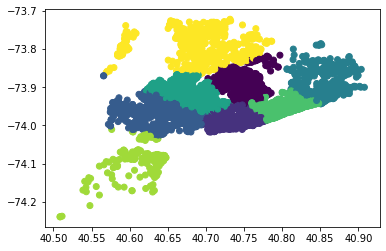

In [1272]:
plt.scatter(df['latitude'], df['longitude'], c=df['cluster'])

In [1273]:
df['neighbourhood_class'] = [neighbourhoods[n] for n in df['neighbourhood']]
df['room_type_class'] = [room_types[r] for r in df['room_type']]

df.head()

,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,cluster,neighbourhood_class,room_type_class
0,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1,1,133,2
1,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1,2,137,2
2,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19,1,62,2
3,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365,4,135,0
4,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242,1,62,0


In [1274]:
one_hot_cluster = pd.get_dummies(df['cluster'])
one_hot_neighbourhood = pd.get_dummies(df['neighbourhood_class'])
one_hot_roomtype = pd.get_dummies(df['room_type_class'])

print(one_hot_cluster.to_numpy().shape)
print(one_hot_neighbourhood.to_numpy().shape)
print(one_hot_roomtype.to_numpy().shape)

(17614, 8)
(17614, 186)
(17614, 4)


In [1275]:
stats = {}
cols = ['latitude', 'longitude', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'availability_2020']

for col in cols:
    stats[col] = {'mean': df[col].mean(), 'std': df[col].std()}

stats

{'latitude': {'mean': 40.72675455262859, 'std': 0.05698110083552779},
 'longitude': {'mean': -73.94773202111956, 'std': 0.05021280178357141},
 'days_occupied_in_2019': {'mean': 179.51765640967412,
  'std': 130.2020145139134},
 'minimum_nights': {'mean': 7.392926081526059, 'std': 19.233869150828692},
 'number_of_reviews': {'mean': 56.12898830475758, 'std': 65.9723695359566},
 'availability_2020': {'mean': 154.1547632565005, 'std': 138.0796509770023}}

In [1276]:
normalized = []

for col in cols:
    norm = (df[col] - stats[col]['mean']) / stats[col]['std']
    normalized.append(norm)

normalized[0]

0        0.471480
1       -0.730322
2        0.367059
3       -0.699786
4        0.669265
           ...   
17609   -0.590276
17610   -1.268746
17611   -0.263852
17612   -0.274206
17613   -0.265080
Name: latitude, Length: 17614, dtype: float64

In [1277]:
a = one_hot_cluster.to_numpy().T
b = one_hot_neighbourhood.to_numpy().T
c = one_hot_roomtype.to_numpy().T
d = np.array(normalized)

In [1278]:
x = np.concatenate((a, c, d), axis=0)

x.shape

(18, 17614)

In [1279]:
y = df['price'].to_numpy()

y

array([225,  89, 200, ...,  41,  38,  41])

In [1280]:
split = int(y.shape[0] / 5)

x_train, x_test = x[:, split:].T, x[:, :split].T
y_train, y_test = y[split:], y[:split]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(14092, 18) (3522, 18)
(14092,) (3522,)


In [1281]:
import torch
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
test_dataset = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))

In [1282]:
import torch.nn as nn
import torch.optim as optim 

model = nn.Sequential(
    nn.Linear(18, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
)

loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters())


In [1283]:
total_loss = 0
count = 0

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

for x, y in test_dataloader:
    y_hat = model(x.float())
    loss = loss_function(y_hat, y.float())

    total_loss += loss.item()
    count += 1

print(total_loss / (64 * count))

1365.7619601658412


/home/mputo/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/mputo/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [1284]:
for epoch in range(0, 5):
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    for x, y in dataloader:
        model.zero_grad()

        y_hat = model(x.float())
        loss = loss_function(y_hat.squeeze(), y.float())

        loss.backward()
        optimizer.step()

In [1285]:
total_loss = 0
count = 0

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

for x, y in test_dataloader:
    y_hat = model(x.float())
    loss = loss_function(y_hat, y.float())

    total_loss += loss.item()
    count += 1

print(total_loss / (64 * count))

888.6877980913434


In [1286]:
df['prediction'] = 0

for i in range(x_train.shape[0]):
    df['prediction'].loc[i] = model(torch.tensor(x_train[i], dtype=torch.float)).detach().numpy()

/tmp/ipykernel_141543/898076548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction'].loc[i] = model(torch.tensor(x_train[i], dtype=torch.float)).detach().numpy()


In [1287]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,cluster,neighbourhood_class,room_type_class,prediction
0,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1,1,133,2,186.626053
1,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1,2,137,2,270.787354
2,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19,1,62,2,219.461044
3,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365,4,135,0,213.607376
4,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242,1,62,0,217.218750


In [1288]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

df_tree = df[['latitude', 'longitude', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_2020']]

clf = tree.DecisionTreeRegressor()

In [1289]:
clf.fit(np.array(df_tree.loc[split:]), np.array(df['price'].loc[split:]))

for i in range(0, 5):
    print(clf.predict(np.array(df_tree.loc[i]).reshape(1, -1)))

[250.]
[70.]
[180.]
[89.]
[175.]


In [1290]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,cluster,neighbourhood_class,room_type_class,prediction
0,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1,1,133,2,186.626053
1,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1,2,137,2,270.787354
2,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19,1,62,2,219.461044
3,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365,4,135,0,213.607376
4,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242,1,62,0,217.218750


In [1291]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, np.array(df_tree.loc[:split]), np.array(df['price'].loc[:split]), cv=10).mean()

-2.684321130419689

In [1292]:
dummies = [one_hot_cluster, one_hot_roomtype, df_tree]

all_information = pd.concat(dummies, axis=1, ignore_index=True)

In [1293]:
clf = tree.DecisionTreeRegressor()
clf.fit(np.array(all_information.loc[split:]), np.array(df['price'].loc[split:]))

for i in range(0, 5):
    print(clf.predict(np.array(all_information.loc[i]).reshape(1, -1)))

[93.]
[188.]
[100.]
[36.]
[124.]


In [1294]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,cluster,neighbourhood_class,room_type_class,prediction
0,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1,1,133,2,186.626053
1,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1,2,137,2,270.787354
2,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19,1,62,2,219.461044
3,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365,4,135,0,213.607376
4,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242,1,62,0,217.218750


In [1295]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, np.array(all_information.loc[:split]), np.array(df['price'].loc[:split]), cv=10).mean()

-2.192611179337256

In [1301]:
total = 0
for i, price in enumerate(df['price']):
    total += abs(price - clf.predict(np.array(all_information.loc[i]).reshape(1, -1)))[0]

print(total)

391334.0


In [1303]:
total / df['price'].shape[0]

22.217213580106733

Drzewo decyzyjne daje bardziej optymalne rozwiązanie od sieci neuronowej. Strata dla drzewa decyzyjnego ~22, natomiast dla sieci neuronowej ~30.